# Chapter 8 Homework Answers

In [2]:
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
from watermark import watermark

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [55]:
%load_ext watermark
%watermark

Last updated: 2024-07-03T17:03:12.959520-04:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.17.2

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [56]:
%watermark --iversions

numpy     : 1.25.2
pymc      : 5.9.2
matplotlib: 3.8.2
pandas    : 2.1.3
arviz     : 0.16.1



# 8E1. 
For each of the causal relationships below, name a hypothetical third variable that would lead to an interaction effect.
1. Bread dough rises because of yeast.
2. Education leads to higher income.
3. Gasoline makes a car go.

## 8E1 Answers
1.  Temperature - The temperature can effect yeast and how the bread rises
2.  Location - Location can influence educational attainment and income
3.  Engine Efficiency - How much a car "goes" can depend on the engine in the car and how it uses fuel

# 8E2

Which of the following explanations invokes an interaction?
1. Caramelizing onions requires cooking over low heat and making sure the onions do not
dry out.
2. A car will go faster when it has more cylinders or when it has a better fuel injector.
3. Most people acquire their political beliefs from their parents, unless they get them instead
from their friends.
4. Intelligent animal species tend to be either highly social or have manipulative appendages
(hands, tentacles, etc.)

## 8E2 Answers  
1. The temperature will influence how quickly the onions dry out and how it caramalizes.  This indicates an interaction
2. Some feature of a fuel injector might cause an interaction between the car speed and the cylinders.  But this is stated as an "or" not an and, so it indicates no interaction?
3. No interaction here?
4. No interaction here? 

# 8E3. 
For each of the explanations in 8E2, write a linear model that expresses the stated relationship.

## 8E3 Answers  
1. Caramelization = a + bt*Temp + bd*DryingOut + btd*Temp*DryingOut
2. Speed = a + bc*Cylinders + bf*FuelInjectors
3. PBeliefs = a + bp*Parents + pf*Friends
4. Not sure what is measured here.Intelligence?

 # 8M1. 
 Recall the tulips example from the chapter. Suppose another set of treatments adjusted the temperature in the greenhouse over two levels: cold and hot. The data in the chapter were collected at the cold temperature. You find none of the plants grown under the hot temperature developed any blooms at all, regardless of the water and shade levels. Can you explain this result in terms of interactions between water, shade, and temperature?

## 8M1 Answer
What we would see is that basically, when the temperature is hot, the slope of blooms would be zero irregardless of water and shade.  This would mean that when the temperature is hot, the coefficents are basically zero.  So there is a thre way interaction 

# 8M2. 
Can you invent a regression equation that would make the bloom size zero, whenever the temperature is hot?

## 8M2 Answer  
Blooms = B_Temperature * (B_Water*Water + B_Shade*Shade + B_Water_Shade*Water*Shade)

# 8M3. 
In parts of North America, ravens depend upon wolves for their food. This is because ravens are carnivorous but cannot usually kill or open carcasses of prey. Wolves however can and do kill and tear open animals, and they tolerate ravens co-feeding at their kills. This species relationship is generally described as a “species interaction.” Can you invent a hypothetical set of data on raven population size in which this relationship would manifest as a statistical interaction? Do you think the biological interaction could be linear? Why or why not

## 8M3 Answer:
If ravens need wolves to eat, then there will be a relationship between the wolf population and raven population.  However, since ravens are much smaller, they probably eat a lot less than wolves.  So the number of ravens will probably increase faster than the wolf population, because more wolves may tolerate a great number of ravens since, as a pack, they can hunt more food.  It's also population since the food may be finite, wolves may be less tolerant of ravens when there are fewer wolves because it is harder to hunt, and also when there is a large wolf population and food is limited.  So maybe the raven population will be curved, with the lowest points when wolf populations are small and large

# 8M4.
 Repeat the tulips analysis, but this time use priors that constrain the effect of water to be positive and the effect of shade to be negative. Use prior predictive simulation. What do these prior assumptions mean for the interaction prior, if anything?

In [10]:
tulip_data = pd.read_csv("./data/tulips.csv", delimiter=";")
tulip_data.head()

,bed,water,shade,blooms
0,a,1,1,0.00
1,a,1,2,0.00
2,a,1,3,111.04
3,a,2,1,183.47
4,a,2,2,59.16


In [11]:
tulip_data["blooms_std"] = tulip_data["blooms"] / tulip_data["blooms"].max()
tulip_data["water_cent"] = tulip_data["water"] - tulip_data["water"].mean()
tulip_data["shade_cent"] = tulip_data["shade"] - tulip_data["shade"].mean()

In [14]:
with pm.Model() as m_8m5_orig:
    a = pm.Normal("a", 0.5, 0.25)
    bw = pm.Normal("bw", 0, 0.25)
    bs = pm.Normal("bs", 0, 0.25)
    bws = pm.Normal("bws", 0, 0.25)

    mu = (
        a
        + bw * tulip_data["water_cent"].values
        + bs * tulip_data["shade_cent"].values
        + bws * tulip_data["water_cent"].values * tulip_data["shade_cent"].values
    )
    sigma = pm.Exponential("sigma", 1)

    blooms_std = pm.Normal("blooms_std", mu, sigma, observed=tulip_data["blooms_std"].values)

    m_8m5_orig_trace = pm.sample(idata_kwargs={"log_likelihood": True})
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bw, bs, bws, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [15]:
with pm.Model() as m_8m5:
    a = pm.Normal("a", 0.5, 0.25)
    bw = pm.Normal("bw", 0.5, 0.25)
    bs = pm.Normal("bs", -0.5, 0.25)
    bws = pm.Normal("bws", 0, 0.25)

    mu = (
        a
        + bw * tulip_data["water_cent"].values
        + bs * tulip_data["shade_cent"].values
        + bws * tulip_data["water_cent"].values * tulip_data["shade_cent"].values
    )
    sigma = pm.Exponential("sigma", 1)

    blooms_std = pm.Normal("blooms_std", mu, sigma, observed=tulip_data["blooms_std"].values)

    m_8m5_trace = pm.sample()
    m_8m5_prior = pm.sample_prior_predictive(500)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bw, bs, bws, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Sampling: [a, blooms_std, bs, bw, bws, sigma]


In [16]:
az.summary(m_8m5_orig_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.357,0.028,0.303,0.408,0.000,0.0,4023.0,2936.0,1.0
bw,0.206,0.034,0.141,0.267,0.000,0.0,5367.0,3052.0,1.0
bs,-0.114,0.034,-0.180,-0.051,0.000,0.0,5589.0,3015.0,1.0
bws,-0.141,0.042,-0.229,-0.069,0.001,0.0,4550.0,2897.0,1.0
sigma,0.143,0.022,0.103,0.185,0.000,0.0,3631.0,2746.0,1.0


In [17]:
az.summary(m_8m5_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.358,0.027,0.310,0.412,0.000,0.0,5484.0,3330.0,1.0
bw,0.215,0.035,0.153,0.282,0.001,0.0,4615.0,3066.0,1.0
bs,-0.123,0.034,-0.189,-0.061,0.000,0.0,4803.0,2978.0,1.0
bws,-0.143,0.041,-0.218,-0.063,0.001,0.0,5558.0,3068.0,1.0
sigma,0.143,0.022,0.105,0.186,0.000,0.0,2601.0,3138.0,1.0


Changing the priors seems to have had no effect on the coefficients at all

In [18]:
m_8m5_prior

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

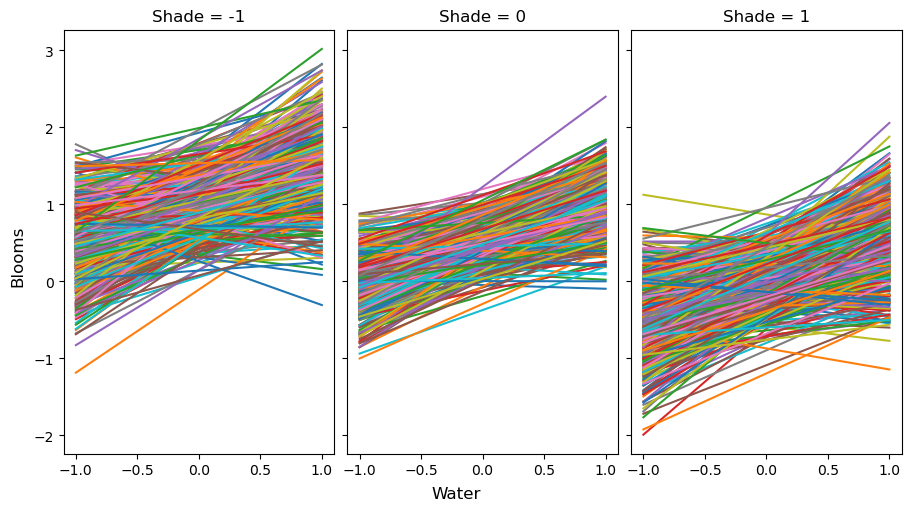

In [19]:
#a = pm.Normal("a", 0.5, 0.25)
#bw = pm.Normal("bw", 0.5, 0.25)
#bs = pm.Normal("bs", -0.5, 0.25)
#bws = pm.Normal("bws", 0, 0.25)

x_values = np.linspace(-1,1)
fig, ax = plt.subplots(1, 3, figsize=[9, 5], sharey=True, sharex=True, constrained_layout=True)

for col, shade_value in enumerate([-1,0,1]):
    predictions = np.zeros((len(x_values), 500))
    prior_data = m_8m5_prior['prior']
    
    for i,value in enumerate(x_values):
        predictions[i] = prior_data['a'] + prior_data['bw'] * value + prior_data['bs'] * shade_value + prior_data['bws'] * value * shade_value 
    
    for i in predictions.T:
        ax[col].set_title(f'Shade = {shade_value}')
        ax[col].plot(x_values, i)
        fig.supxlabel('Water')
        fig.supylabel('Blooms')

Looking at the Prior plots, we can see that blooms increase with water, but the baseline is very different based on the shade.  With the least shade, the simulated blooms are higher comared to when there is more shade(1).

# 8H1. 
Return to the data(tulips) example in the chapter. Now include the bed variable as a predictor in the interaction model. Don’t interact bed with the other predictors; just include it as a main effect. Note that bed is categorical. So to use it properly, you will need to either construct dummy variables or rather an index variable, as explained in Chapter 5

In [22]:
tulip_data['bed_id'] = pd.Categorical(tulip_data['bed']).codes
tulip_data['bed_id'].max() + 1

3

In [23]:
with pm.Model() as m_8h1:
    a = pm.Normal("a", 0.5, 0.25)
    bw = pm.Normal("bw", 0, 0.25)
    bs = pm.Normal("bs", 0, 0.25)
    bws = pm.Normal("bws", 0, 0.5)
    bbeds = pm.Normal('bbeds', 0, 0.5, shape =[tulip_data['bed_id'].max() + 1])

    mu = (
        a
        + bbeds[tulip_data['bed_id']]
        + bw * tulip_data["water_cent"].values
        + bs * tulip_data["shade_cent"].values
        + bws * tulip_data["water_cent"].values * tulip_data["shade_cent"].values
        
    )
    sigma = pm.Exponential("sigma", 1)

    blooms_std = pm.Normal("blooms_std", mu, sigma, observed=tulip_data["blooms_std"].values)

    m_8h1_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bw, bs, bws, bbeds, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


In [25]:
az.summary(m_8h1_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.436,0.183,0.110,0.782,0.005,0.004,1352.0,1635.0,1.0
bw,0.206,0.031,0.146,0.263,0.001,0.000,3197.0,2342.0,1.0
bs,-0.113,0.031,-0.171,-0.057,0.001,0.000,3474.0,2172.0,1.0
bws,-0.145,0.038,-0.217,-0.073,0.001,0.001,3062.0,2074.0,1.0
bbeds[0],-0.167,0.187,-0.525,0.167,0.005,0.004,1356.0,1657.0,1.0
bbeds[1],-0.042,0.187,-0.389,0.307,0.005,0.004,1368.0,1839.0,1.0
bbeds[2],-0.029,0.188,-0.386,0.299,0.005,0.004,1351.0,1650.0,1.0
sigma,0.131,0.022,0.095,0.173,0.000,0.000,2367.0,2247.0,1.0


The coefficients of the beds are close to zero, or overlap with zero. So they are not really improving the prediction, and we should expect the WAIC score to be similar to a model without beds.

# 8H2. 
Use WAIC to compare the model from 8H1 to a model that omits bed. What do you infer from this comparison? Can you reconcile the WAIC results with the posterior distribution of the bed coefficients?

In [26]:
compare_data_8h2 = az.compare({'Without_Beds':m_8m5_orig_trace,
            'With_Beds':m_8h1_trace},
           scale='deviance',
           ic='waic'
          )
compare_data_8h2

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:307: FutureWarning: Setting an item of incompatible

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
With_Beds,0,-27.755014,5.986629,0.000000,0.73467,6.259368,0.000000,True,deviance
Without_Beds,1,-24.666186,4.486678,3.088828,0.26533,7.459773,5.454773,True,deviance


d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\backends\matplotlib\compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_waic (deviance)', ylabel='ranked models'>

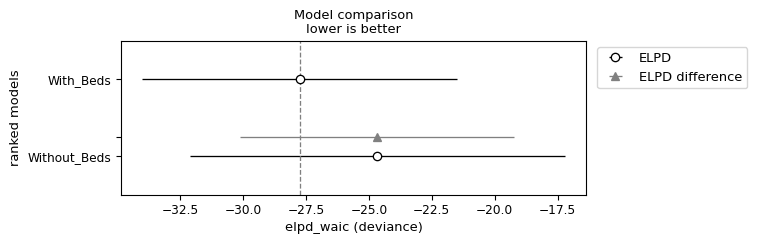

In [28]:
az.plot_compare(compare_data_8h2)

Given that the coefficients for beds was close to zero or included zero, it was expected that the model with beds is not going to have a much better WAIC score than the model without beds.  Since adding beds increases the number of paramters but does not add any predictive power, we expect the score to be lower since the penalty is larger with more paramters 

# 8H3. 
Consider again the data(rugged) data on economic development and terrain ruggedness,examined in this chapter. One of the African countries in that example, Seychelles, is far outside the cloud of other nations, being a rare country with both relatively high GDP and high ruggedness. Seychelles is also unusual, in that it is a group of islands far from the coast of mainland Africa, and its main economic activity is tourism.

a. Focus on model m8.5 from the chapter. Use WAIC pointwise penalties and PSIS Pareto k
values to measure relative influence of each country. By these criteria, is Seychelles influencing the
results? Are there other nations that are relatively influential? If so, can you explain why?

b. Now use robust regression, as described in the previous chapter. Modify m8.5 to use a
Student-t distribution with ν = 2. Does this change the results in a substantial way

In [29]:
rugged_data_raw = pd.read_csv('./data/rugged.csv', sep=';')
rugged_data_raw.head()

,isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,...,africa_region_w,africa_region_e,africa_region_c,slave_exports,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent
0,ABW,533,Aruba,0.462,0.380,1.226,0.144,0.000,18.0,12.508,...,0,0,0,0.0,NaN,NaN,NaN,NaN,614.0,NaN
1,AFG,4,Afghanistan,2.518,1.469,7.414,0.720,39.004,65209.0,33.833,...,0,0,0,0.0,NaN,NaN,NaN,NaN,1870829.0,0.0
2,AGO,24,Angola,0.858,0.714,2.274,0.228,4.906,124670.0,-12.299,...,0,0,1,3610000.0,5.669,6.981,4.926,3.872,1223208.0,2.0
3,AIA,660,Anguilla,0.013,0.010,0.026,0.006,0.000,9.0,18.231,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,8,Albania,3.427,1.597,10.451,1.006,62.133,2740.0,41.143,...,0,0,0,0.0,NaN,NaN,NaN,NaN,200000.0,100.0


In [30]:
rugged_data = rugged_data_raw.dropna(subset=["rgdppc_2000"]).copy()
rugged_data["log_gdp"] = np.log(rugged_data["rgdppc_2000"])
rugged_data["log_gdp_std"] = rugged_data["log_gdp"] / rugged_data["log_gdp"].mean()
rugged_data["rugged_std"] = rugged_data["rugged"] / rugged_data["rugged"].max()

In [31]:
in_africa = pd.Categorical(rugged_data["cont_africa"])

In [33]:
with pm.Model() as m_8h3a:
    a = pm.Normal("a", 1, 0.1, shape=2)
    b = pm.Normal("b", 0, 0.3, shape=2)
    mu = a[in_africa.codes] + b[in_africa.codes] * (rugged_data["rugged_std"].values - 0.215)
    sigma = pm.Exponential("sigma", 1)
    log_gdp_std = pm.Normal("log_gdp_std", mu, sigma, observed=rugged_data["log_gdp_std"].values)
    m_8h3a_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


In [34]:
az.summary(m_8h3a_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],1.050,0.010,1.030,1.068,0.000,0.000,6333.0,3571.0,1.0
a[1],0.887,0.016,0.857,0.918,0.000,0.000,5659.0,3279.0,1.0
b[0],-0.143,0.057,-0.251,-0.034,0.001,0.001,6814.0,3119.0,1.0
b[1],0.132,0.075,-0.006,0.271,0.001,0.001,6081.0,3161.0,1.0
sigma,0.112,0.006,0.100,0.123,0.000,0.000,5059.0,3097.0,1.0


In [35]:
m_8h3_waic = az.waic(m_8h3a_trace, pointwise=True)
m_8h3_psis = az.loo(m_8h3a_trace, pointwise=True)

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [36]:
m_8h3_waic_pointwise = m_8h3_waic.waic_i.values
m_8h3_psis_k = m_8h3_psis.pareto_k.values

In [37]:
m_8h3_psis

Computed from 4000 posterior samples and 170 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   129.50     7.31
p_loo        5.08        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      169   99.4%
 (0.5, 0.7]   (ok)          1    0.6%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [38]:
rugged_data['waic'] = m_8h3_waic_pointwise
rugged_data['psis'] = m_8h3_psis_k
rugged_data['high_psis'] = np.abs(rugged_data['psis']) > .3

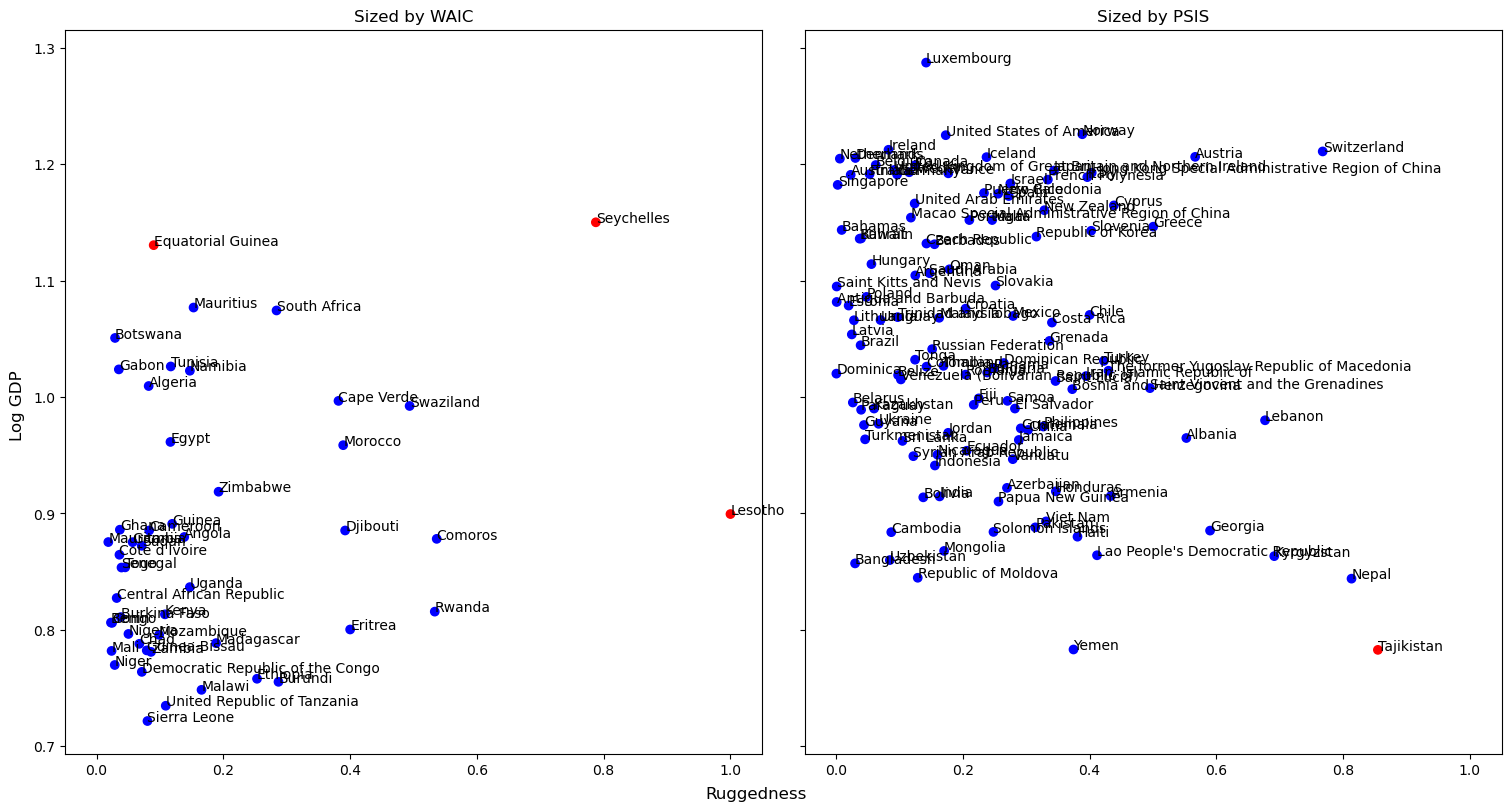

In [39]:
rugged_data['colors'] = rugged_data['high_psis'].apply(lambda x: 'r' if x else 'b')

africa_data = rugged_data[rugged_data['cont_africa'] == 1]
other_data = rugged_data[rugged_data['cont_africa'] == 0]

fig, ax = plt.subplots(1, 2, figsize=[15, 8], sharey=True, sharex=True, constrained_layout=True)
ax[0].scatter(africa_data["rugged_std"],africa_data["log_gdp_std"], c=africa_data['colors'])
ax[0].set_title('Sized by WAIC')
ax[1].scatter(other_data["rugged_std"],other_data["log_gdp_std"], c=other_data['colors'])
ax[1].set_title('Sized by PSIS')
fig.supxlabel('Ruggedness')
fig.supylabel('Log GDP')

for i in africa_data.itertuples():
    ax[0].annotate(i.country, (i.rugged_std, i.log_gdp_std))

for i in other_data.itertuples():
    ax[1].annotate(i.country, (i.rugged_std, i.log_gdp_std))

In [45]:
rugged_data[np.abs(rugged_data['psis']) > 0.3][['country','rugged_std','log_gdp_std','waic','psis']].sort_values('psis', ascending=False)

,country,rugged_std,log_gdp_std,waic,psis
121,Lesotho,1.000000,0.899409,0.616352,0.542744
198,Seychelles,0.787649,1.150126,-0.557244,0.332520
204,Tajikistan,0.854724,0.782692,-0.200388,0.323540
81,Equatorial Guinea,0.090132,1.130472,-1.588590,0.314997


Strictly speaking, only Lesootho stands out as a bit of an outlier in the psis k_values > 0.5.  Seychelles does have  K value that is closer to the limit of what would be considered "good"

In [46]:
with pm.Model() as m_8h3b:
    a = pm.Normal("a", 1, 0.1, shape=2)
    b = pm.Normal("b", 0, 0.3, shape=2)
    mu = a[in_africa.codes] + b[in_africa.codes] * (rugged_data["rugged_std"].values - 0.215)
    sigma = pm.Exponential("sigma", 1)
    log_gdp_std = pm.StudentT("log_gdp_std", nu=2, mu=mu, sigma=sigma, observed=rugged_data["log_gdp_std"].values)
    m_8h3b_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

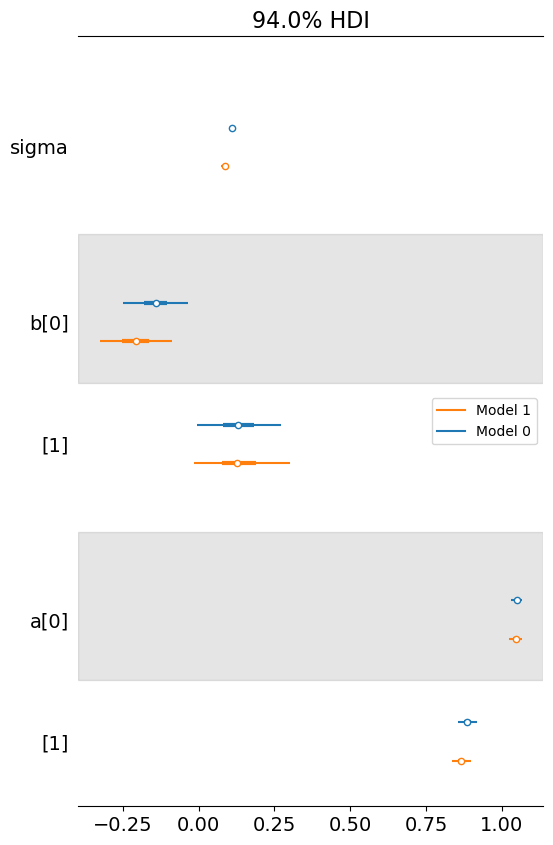

In [47]:
az.plot_forest([m_8h3a_trace,m_8h3b_trace], combined=True)

In [48]:
az.loo(m_8h3b_trace)

Computed from 4000 posterior samples and 170 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   110.66     8.74
p_loo        6.06        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      170  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

Looking at the k-values, we can see that now all the values are good and below 0.5.  There also is a shift in the b[0] coefficient.

# 8H4 
The values in data(nettle) are data on language diversity in 74 nations.143 The meaning of each column is given below.
1. country: Name of the country
2. num.lang: Number of recognized languages spoken
3. area: Area in square kilometers
4.  k.pop: Population, in thousands
5.  num.stations: Number of weather stations that provided data for the next two columns
6.  mean.growing.season: Average length of growing season, in months
7. sd.growing.season: Standard deviation of length of growing season, in months
Use these data to evaluate the hypothesis that language diversity is partly a product of food security. The notion is that, in productive ecologies, people don’t need large social networks to buffer them against risk of food shortfalls. This means cultural groups can be smaller and more self-sufficient, leading to more languages per capita. Use the number of languages per capita as the outcome: 

d$lang.per.cap <- d$num.lang / d$k.pop

Use the logarithm of this new variable as your regression outcome. (A count model would be better here, but you’ll learn those later, in Chapter 11.) This problem is open ended, allowing you to decide how you address the hypotheses and the uncertain advice the modeling provides. If you think you need to use WAIC anyplace, please do. If you think you need certain priors, argue for them. If you think you need to plot predictions in a certain way, please do. Just try to honestly evaluate the main effects of both mean.growing.season and sd.growing.season, as well as their two-way interaction. Here are three parts to help. (a) Evaluate the hypothesis that language diversity,as measured by log(lang.per.cap), is positively associated with the average length of the growing season, mean.growing.season. Consider log(area) in your regression(s) as a covariate (not an interaction). Interpret your results. (b) Now evaluate the hypothesis that language diversity is negatively associated with the standard deviation of length of growing season, sd.growing.season. This hypothesis follows from uncertainty in harvest favoring social insurance through larger social networks and therefore fewer languages. Again, consider log(area) as a covariate (not an interaction). Interpret your results. (c) Finally, evaluate the hypothesis that mean.growing.season and sd.growing.season interact to synergistically reduce language diversity. The idea is that, in nations with longer average growing seasons, high variance makes storage and redistribution even more important than it would be otherwise. That way, people can cooperate to preserve and protect windfalls to be used during the droughts

In [4]:
#8H4
nettle_data = pd.read_csv("./data/nettle.csv", delimiter=";")
nettle_data.head()

,country,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season
0,Algeria,18,2381741,25660,102,6.60,2.29
1,Angola,42,1246700,10303,50,6.22,1.87
2,Australia,234,7713364,17336,134,6.00,4.17
3,Bangladesh,37,143998,118745,20,7.40,0.73
4,Benin,52,112622,4889,7,7.14,0.99


In [5]:
nettle_data.describe()

,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season
count,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000
mean,89.729730,8.806982e+05,33574.067568,37.905405,7.041486,1.699189
std,144.156431,1.399199e+06,102226.246085,50.883205,3.143845,1.066081
min,1.000000,1.218900e+04,102.000000,1.000000,0.000000,0.000000
25%,17.250000,1.677075e+05,3828.750000,10.000000,5.347500,0.937500
50%,40.000000,4.347960e+05,9487.000000,20.500000,7.355000,1.690000
75%,93.750000,1.080316e+06,24744.500000,44.750000,9.282500,2.107500
max,862.000000,8.511965e+06,849638.000000,272.000000,12.000000,5.870000


In [6]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [7]:
nettle_data['lang_per_cap'] = nettle_data['num.lang'] / nettle_data['k.pop']
nettle_data['mgs_std'] = standardize(nettle_data['mean.growing.season'])
nettle_data['sd_std'] = standardize(nettle_data['sd.growing.season'])
nettle_data['log_area'] = np.log(nettle_data['area'])

In [8]:
nettle_data.describe()

,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season,lang_per_cap,mgs_std,sd_std,log_area
count,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01,74.000000
mean,89.729730,8.806982e+05,33574.067568,37.905405,7.041486,1.699189,0.020646,2.460494e-16,-8.776763e-17,12.934910
std,144.156431,1.399199e+06,102226.246085,50.883205,3.143845,1.066081,0.083197,1.006826e+00,1.006826e+00,1.272566
min,1.000000,1.218900e+04,102.000000,1.000000,0.000000,0.000000,0.000093,-2.255057e+00,-1.604745e+00,9.408289
25%,17.250000,1.677075e+05,3828.750000,10.000000,5.347500,0.937500,0.001990,-5.425043e-01,-7.193531e-01,12.028959
50%,40.000000,4.347960e+05,9487.000000,20.500000,7.355000,1.690000,0.004107,1.004037e-01,-8.678437e-03,12.980548
75%,93.750000,1.080316e+06,24744.500000,44.750000,9.282500,2.107500,0.010006,7.176914e-01,3.856162e-01,13.892325
max,862.000000,8.511965e+06,849638.000000,272.000000,12.000000,5.870000,0.680982,1.587979e+00,3.938990e+00,15.956983


In [9]:
with pm.Model() as m_8h4_a:
    a = pm.Normal("a", 1, 0.5)
    b_area = pm.Normal("b_area", 0, 0.3)
    b_ms = pm.Normal("b_mean", 0, 0.3)
    #b_sd = pm.Normal("b_sd", 0, 0.3)
    #b_ms_sd = pm.Normal("b_md_sd", 0, 0.3)
    mu = a + b_area*nettle_data['log_area'] + b_ms*nettle_data['mgs_std']
    sigma = pm.Exponential("sigma", 1)
    lang_per_cap = pm.Normal("lang_per_cap", mu=mu, sigma=sigma, observed=nettle_data["lang_per_cap"].values)
    m_8h4a_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_area, b_mean, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


In [10]:
az.summary(m_8h4a_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.286,0.105,0.093,0.483,0.003,0.002,994.0,1708.0,1.01
b_area,-0.020,0.008,-0.036,-0.006,0.000,0.000,981.0,1706.0,1.01
b_mean,0.012,0.010,-0.007,0.031,0.000,0.000,1924.0,2269.0,1.00
sigma,0.080,0.007,0.066,0.092,0.000,0.000,2172.0,1909.0,1.00


In [11]:
nettle_data['log_area'].min()

9.408289184655837

d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arvi

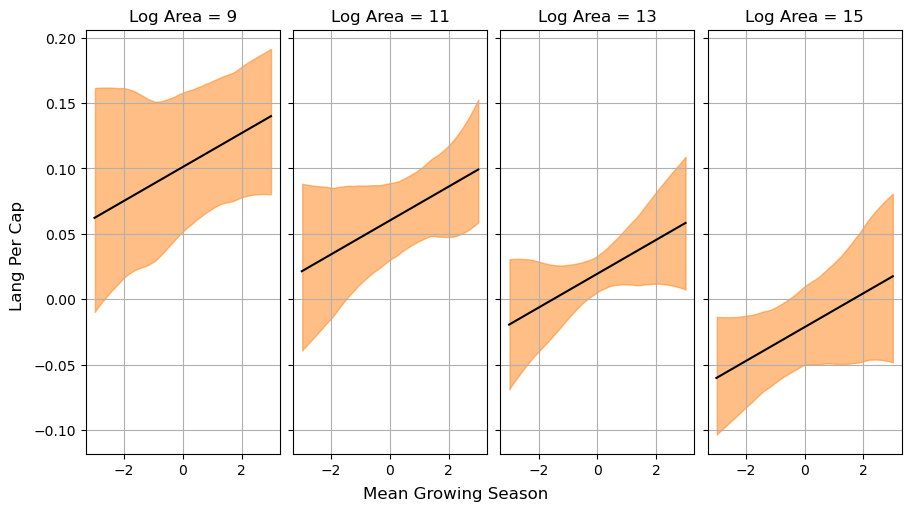

In [12]:
x_values = np.linspace(-3,3)
fig, ax = plt.subplots(1, 4, figsize=[9, 5], sharey=True, sharex=True, constrained_layout=True)

for col, area_value in enumerate([9,11,13,15]):
    predictions = np.zeros((len(x_values), 1000))
    posterior_data = m_8h4a_trace['posterior']
    
    for i,value in enumerate(x_values):
        predictions[i] = posterior_data['a'][0] + posterior_data['b_mean'][0] * value + posterior_data['b_area'][0] * area_value

    predictions_mean = predictions.mean(1)
    predictions_hdi = az.hdi(predictions_mean.T)
    
    ax[col].set_title(f'Log Area = {area_value}')
    ax[col].plot(x_values, predictions_mean, color='black')
    az.plot_hdi(x_values, predictions.T, hdi_prob=0.89, ax = ax[col])
    ax[col].grid()
    fig.supxlabel('Mean Growing Season')
    fig.supylabel('Lang Per Cap')

In general, there is a positive relationship between the length of the growing reason and the number of languages.  

In [13]:
with pm.Model() as m_8h4_b:
    a = pm.Normal("a", 1, 0.5)
    b_area = pm.Normal("b_area", 0, 0.3)
    #b_ms = pm.Normal("b_mean", 0, 0.3)
    b_sd = pm.Normal("b_sd", 0, 0.3)
    #b_ms_sd = pm.Normal("b_md_sd", 0, 0.3)
    mu = a + b_area*nettle_data['log_area'] + b_sd*nettle_data['sd_std']
    sigma = pm.Exponential("sigma", 1)
    lang_per_cap = pm.Normal("lang_per_cap", mu=mu, sigma=sigma, observed=nettle_data["lang_per_cap"].values)
    m_8h4b_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_area, b_sd, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


In [14]:
az.summary(m_8h4b_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.324,0.113,0.106,0.527,0.003,0.002,1193.0,1548.0,1.0
b_area,-0.023,0.009,-0.039,-0.007,0.000,0.000,1199.0,1653.0,1.0
b_sd,-0.002,0.011,-0.024,0.018,0.000,0.000,1530.0,1682.0,1.0
sigma,0.081,0.007,0.068,0.093,0.000,0.000,1835.0,1894.0,1.0


d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arvi

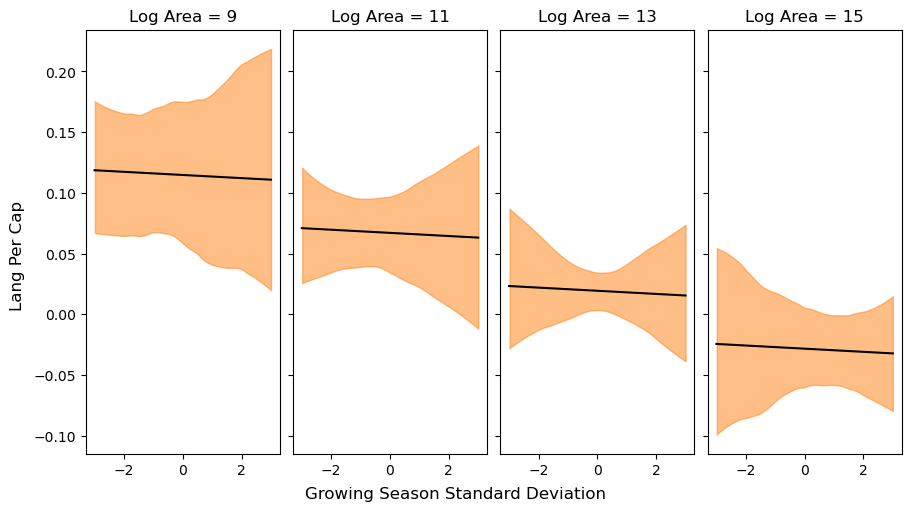

In [15]:
x_values = np.linspace(-3,3)
fig, ax = plt.subplots(1, 4, figsize=[9, 5], sharey=True, sharex=True, constrained_layout=True)

for col, area_value in enumerate([9,11,13,15]):
    predictions = np.zeros((len(x_values), 1000))
    posterior_data = m_8h4b_trace['posterior']
    
    for i,value in enumerate(x_values):
        predictions[i] = posterior_data['a'][0] + posterior_data['b_sd'][0] * value + posterior_data['b_area'][0] * area_value

    predictions_mean = predictions.mean(1)
    predictions_hdi = az.hdi(predictions_mean.T)
    
    ax[col].set_title(f'Log Area = {area_value}')
    ax[col].plot(x_values, predictions_mean, color='black')
    az.plot_hdi(x_values, predictions.T, hdi_prob=0.89, ax = ax[col])
    fig.supxlabel('Growing Season Standard Deviation')
    fig.supylabel('Lang Per Cap')

On it's own, the standard deviation doesn't seem to have much of an effect on number of languages

In [16]:
with pm.Model() as m_8h4_c:
    a = pm.Normal("a", 1, 0.5)
    b_area = pm.Normal("b_area", 0, 0.3)
    b_ms = pm.Normal("b_mean", 0, 0.3)
    b_sd = pm.Normal("b_sd", 0, 0.3)
    b_ms_sd = pm.Normal("b_md_sd", 0, 0.3)
    mu = a + b_area*nettle_data['log_area'] + b_ms*nettle_data['mgs_std'] + b_sd*nettle_data['sd_std'] + b_ms_sd*nettle_data['mgs_std']*nettle_data['sd_std']
    sigma = pm.Exponential("sigma", 1)
    lang_per_cap = pm.Normal("lang_per_cap", mu=mu, sigma=sigma, observed=nettle_data["lang_per_cap"])
    m_8h4c_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_area, b_mean, b_sd, b_md_sd, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

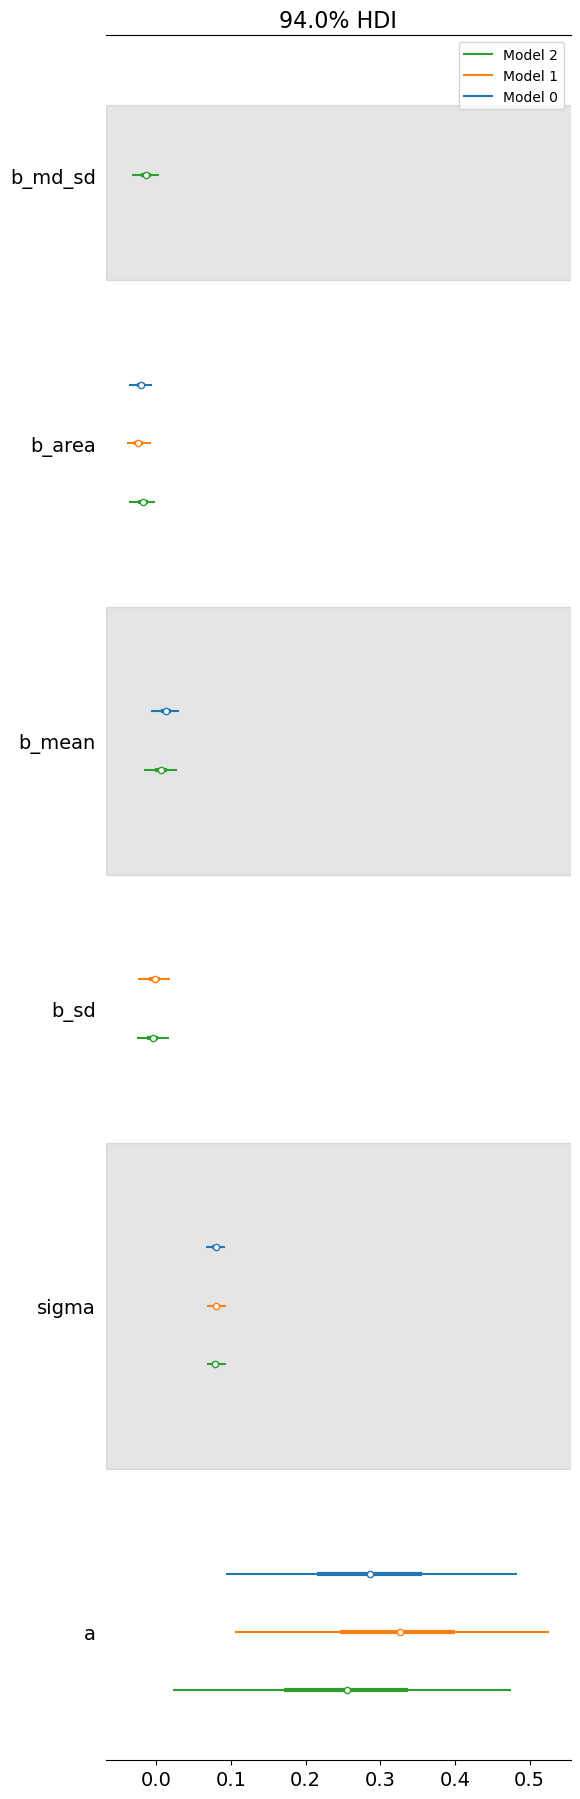

In [17]:
az.plot_forest([m_8h4a_trace,m_8h4b_trace,m_8h4c_trace], combined=True)

In all 3 models, area doesn't seem to have an impact.  So let's take it out of the next model.  It will make it easier to make the next plots.

In [18]:
compare_data_8h4 = az.compare({'Mean and Area':m_8h4a_trace,
            'Mean, Area, SD':m_8h4b_trace,
            'Mean, Area, SD, Interactions':m_8h4c_trace},
           scale='deviance',
           ic='waic'
          )
compare_data_8h4

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:307: FutureWarning: Setting an item of incompatible dtype is dep

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
"Mean, Area, SD, Interactions",0,-130.925481,26.321667,0.000000,0.444443,80.044148,0.000000,True,deviance
Mean and Area,1,-129.076939,26.530868,1.848542,0.555557,86.381466,7.155356,True,deviance
"Mean, Area, SD",2,-124.659744,28.057819,6.265737,0.000000,89.243167,9.651012,True,deviance


In [19]:
with pm.Model() as m_8h4_d:
    a = pm.Normal("a", 1, 0.5)
    #b_area = pm.Normal("b_area", 0, 0.3)
    b_ms = pm.Normal("b_mean", 0, 0.3)
    b_sd = pm.Normal("b_sd", 0, 0.3)
    b_ms_sd = pm.Normal("b_md_sd", 0, 0.3)
    mu = a + b_ms*nettle_data['mgs_std'] + b_sd*nettle_data['sd_std'] + b_ms_sd*nettle_data['mgs_std']*nettle_data['sd_std']
    sigma = pm.Exponential("sigma", 1)
    lang_per_cap = pm.Normal("lang_per_cap", mu=mu, sigma=sigma, observed=nettle_data["lang_per_cap"])
    m_8h4d_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_mean, b_sd, b_md_sd, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [20]:
az.summary(m_8h4d_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.021,0.009,0.004,0.040,0.0,0.0,4122.0,2533.0,1.0
b_mean,0.015,0.010,-0.005,0.034,0.0,0.0,3195.0,3113.0,1.0
b_sd,-0.016,0.009,-0.036,-0.001,0.0,0.0,4138.0,3277.0,1.0
b_md_sd,-0.014,0.009,-0.032,0.003,0.0,0.0,3481.0,3057.0,1.0
sigma,0.080,0.007,0.067,0.093,0.0,0.0,4172.0,3053.0,1.0


d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
d:\Python\venv\pymc_env\lib\site-packages\arvi

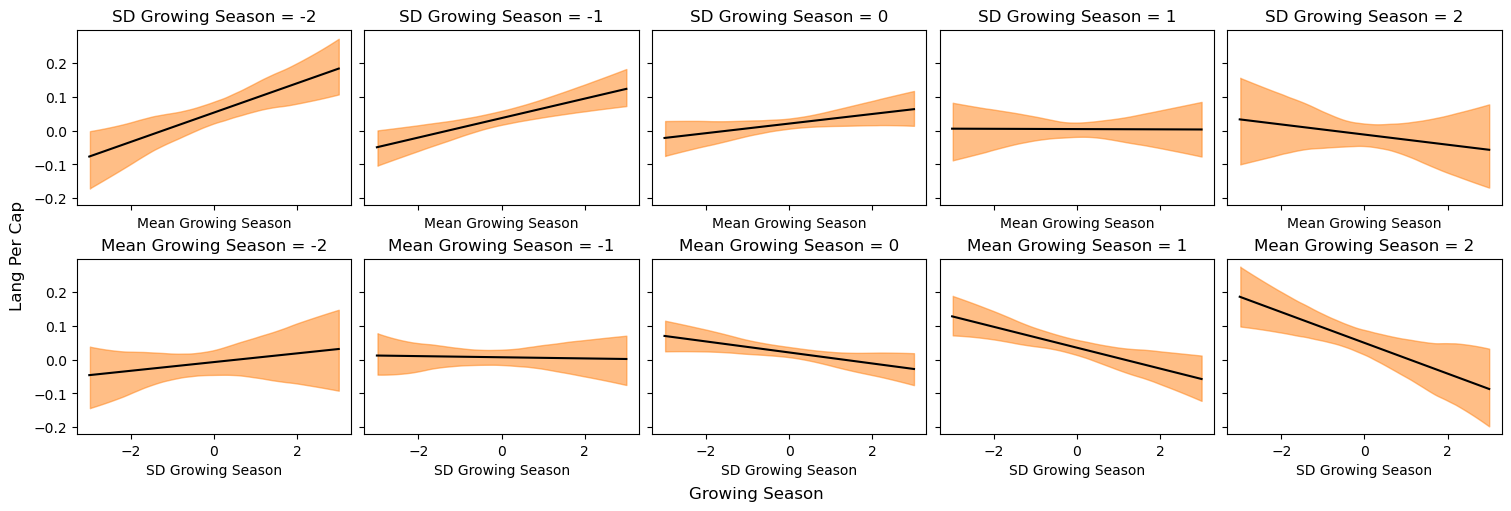

In [21]:
x_values = np.linspace(-3,3)
fig, ax = plt.subplots(2, 5, figsize=[15, 5], sharey=True, sharex=True, constrained_layout=True)

for col, sd_value in enumerate([-2,-1,0,1,2]):
    predictions = np.zeros((len(x_values), 1000))
    posterior_data = m_8h4d_trace['posterior']
    
    for i,value in enumerate(x_values):
        predictions[i] = posterior_data['a'][0] + posterior_data['b_mean'][0]*value + posterior_data['b_sd'][0] * sd_value + posterior_data['b_md_sd'][0]*value*sd_value 
    
    
    predictions_mean = predictions.mean(1)
    predictions_hdi = az.hdi(predictions_mean.T)
    ax[0,col].set_title(f'SD Growing Season = {sd_value}')
    ax[0,col].plot(x_values, predictions_mean, color='black')
    az.plot_hdi(x_values, predictions.T, hdi_prob=0.89, ax = ax[0,col])
    ax[0,col].set(xlabel="Mean Growing Season")
    fig.supylabel('Lang Per Cap')

for col, mean_value in enumerate([-2,-1,0,1,2]):
    predictions = np.zeros((len(x_values), 1000))
    posterior_data = m_8h4d_trace['posterior']
    
    for i,value in enumerate(x_values):
        predictions[i] = posterior_data['a'][0] + posterior_data['b_mean'][0]*mean_value + posterior_data['b_sd'][0] * value + posterior_data['b_md_sd'][0]*mean_value*value 

    predictions_mean = predictions.mean(1)
    predictions_hdi = az.hdi(predictions_mean.T)
    ax[1,col].set_title(f'Mean Growing Season = {mean_value}')
    ax[1,col].plot(x_values, predictions_mean, color='black')
    az.plot_hdi(x_values, predictions.T, hdi_prob=0.89, ax = ax[1,col])
    ax[1,col].set(xlabel="SD Growing Season")
    fig.supxlabel('Growing Season')
    fig.supylabel('Lang Per Cap')

When we take mean and standard deviation together, we can see how they interact and support the claim in the book.  As the standard deviation and the mean growing season gets longer, the number of langauges decreases.  This indicates that longer growing seasons with more variance in the season length mean that people have to work together to ensure food security.  For people to work together, they need to be able to communicate.  Compare this to when the standard deviation is low.  Then there is a evidence that since the food supply is more predictible, different communities have less need to work together, resulting in more languages

In [22]:
compare_data_8h4 = az.compare({'Mean and Area':m_8h4a_trace,
            'Mean, Area, SD':m_8h4b_trace,
            'Mean, Area, SD, Interactions':m_8h4c_trace,
            'Mean, SD, Interactions':m_8h4d_trace},
           scale='deviance',
           ic='waic'
          )
compare_data_8h4

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior varianc

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
"Mean, Area, SD, Interactions",0,-130.925481,26.321667,0.000000,4.309870e-01,80.044148,0.000000,True,deviance
Mean and Area,1,-129.076939,26.530868,1.848542,5.111718e-01,86.381466,7.155356,True,deviance
"Mean, Area, SD",2,-124.659744,28.057819,6.265737,7.010973e-16,89.243167,9.651012,True,deviance
"Mean, SD, Interactions",3,-124.137070,29.511421,6.788412,5.784122e-02,90.935029,11.150649,True,deviance


d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\backends\matplotlib\compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_waic (deviance)', ylabel='ranked models'>

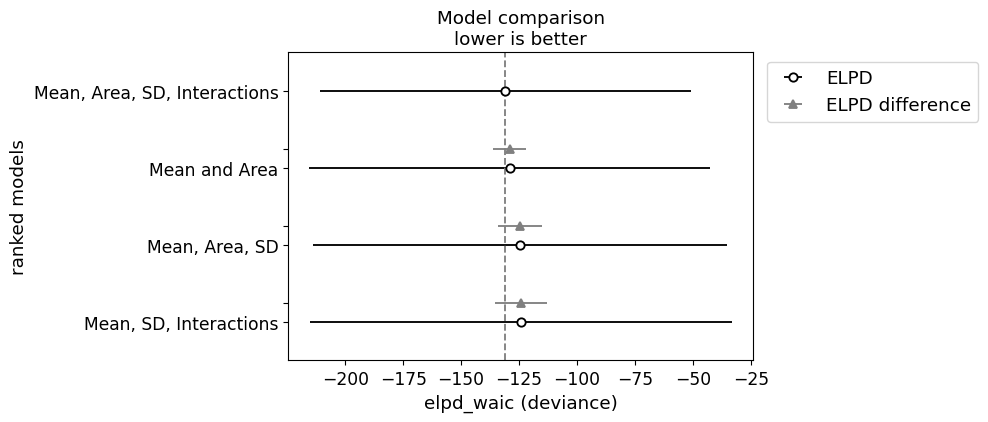

In [23]:
az.plot_compare(compare_data_8h4)

Based on WAIC, It doesn't look like any of these models any any better than the others.

In [24]:
test = az.loo(m_8h4c_trace, pointwise=True)

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [25]:
#Test with Student T Distribution, since there is one datapoint that seems to be causing an issue
with pm.Model() as m_8h4_e:
    a = pm.Normal("a", 1, 0.5)
    #b_area = pm.Normal("b_area", 0, 0.3)
    b_ms = pm.Normal("b_mean", 0, 0.3)
    b_sd = pm.Normal("b_sd", 0, 0.3)
    b_ms_sd = pm.Normal("b_md_sd", 0, 0.3)
    mu = a + b_ms*nettle_data['mgs_std'] + b_sd*nettle_data['sd_std'] + b_ms_sd*nettle_data['mgs_std']*nettle_data['sd_std']
    sigma = pm.Exponential("sigma", 1)
    lang_per_cap = pm.StudentT("lang_per_cap", nu=2, mu=mu, sigma=sigma, observed=nettle_data["lang_per_cap"])
    m_8h4e_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_mean, b_sd, b_md_sd, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [26]:
compare_data_8h4 = az.compare({'Mean and Area':m_8h4a_trace,
                               'Mean, Area, SD':m_8h4b_trace,
                               'Mean, Area, SD, Interactions':m_8h4c_trace,
                               'Mean, SD, Interactions':m_8h4d_trace,
                               'Mean, SD, Interactions, Student T':m_8h4e_trace},
           scale='deviance',
           ic='loo'
          )
compare_data_8h4

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:803: UserWarning: Est

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
"Mean, SD, Interactions, Student T",0,-464.350811,6.059411,0.000000,9.410086e-01,44.669552,0.000000,False,deviance
Mean and Area,1,-141.136766,20.500954,323.214045,5.899144e-02,74.423792,57.683590,True,deviance
"Mean, Area, SD, Interactions",2,-138.773597,22.397609,325.577213,6.769344e-15,71.890037,55.214494,True,deviance
"Mean, Area, SD",3,-133.543793,23.615795,330.807018,0.000000e+00,80.422514,62.473078,True,deviance
"Mean, SD, Interactions",4,-133.441296,24.859308,330.909515,2.442491e-15,81.534902,63.432329,True,deviance


d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\backends\matplotlib\compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_loo (deviance)', ylabel='ranked models'>

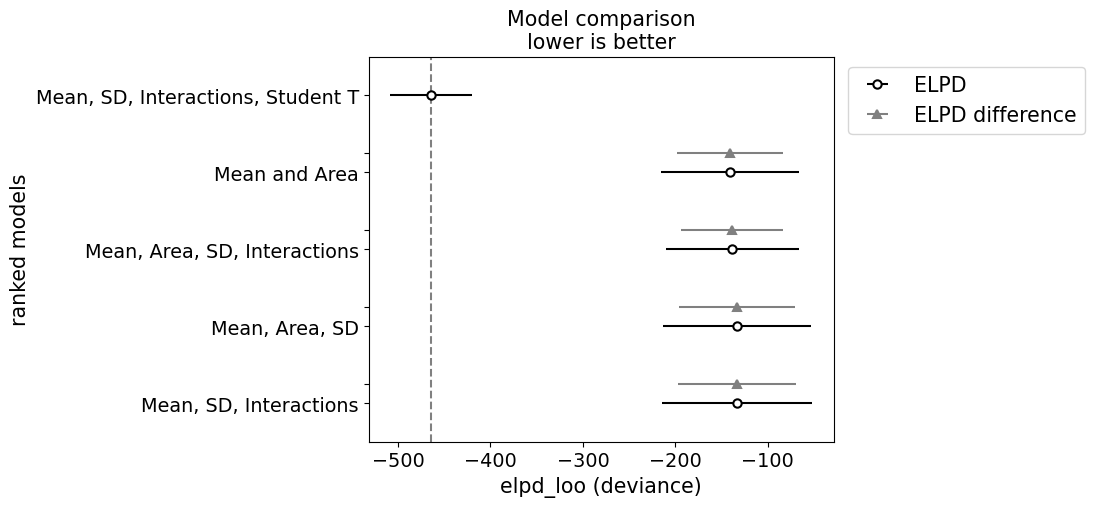

In [27]:
az.plot_compare(compare_data_8h4)

# 8H5

Consider the data(Wines2012) data table. These data are expert ratings of 20 different French
and American wines by 9 different French and American judges. Your goal is to model score, the
subjective rating assigned by each judge to each wine. I recommend standardizing it. In this problem,
consider only variation among judges and wines. Construct index variables of judge and wine and
then use these index variables to construct a linear regression model. Justify your priors. You should
end up with 9 judge parameters and 20 wine parameters. How do you interpret the variation among
individual judges and individual wines? Do you notice any patterns, just by plotting the differences?
Which judges gave the highest/lowest ratings? Which wines were rated worst/best on average?


In [29]:
wines_data = pd.read_csv('./data/Wines2012.csv', sep=';')
wines_data['score_std'] = standardize(wines_data['score'])
wines_data

,judge,flight,wine,score,wine.amer,judge.amer,score_std
0,Jean-M Cardebat,white,A1,10.0,1,0,-1.581002
1,Jean-M Cardebat,white,B1,13.0,1,0,-0.451715
2,Jean-M Cardebat,white,C1,14.0,0,0,-0.075286
3,Jean-M Cardebat,white,D1,15.0,0,0,0.301143
4,Jean-M Cardebat,white,E1,8.0,1,0,-2.333860
...,...,...,...,...,...,...,...
175,Francis Schott,red,F2,12.0,1,1,-0.828144
176,Francis Schott,red,G2,15.0,0,1,0.301143
177,Francis Schott,red,H2,16.0,1,1,0.677572
178,Francis Schott,red,I2,7.0,1,1,-2.710289


In [30]:
wines = pd.Categorical(wines_data['wine'])
judges = pd.Categorical(wines_data['judge'])

In [31]:
with pm.Model() as m_8h5:
    #a = pm.Normal("a", 1, 0.5)
    b_wine = pm.Normal("b_wine", 0, 0.5, shape = len(wines.categories))
    b_judge = pm.Normal("b_judge", 0, 0.5, shape = len(judges.categories))
    mu = b_wine[wines.codes] + b_judge[judges.codes]
    sigma = pm.Exponential("sigma", 1)
    score_std = pm.Normal("score_std", mu=mu, sigma=sigma, observed=wines_data["score_std"])
    m_8h5_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_wine, b_judge, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [32]:
az.summary(m_8h5_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_wine[0],0.118,0.264,-0.409,0.592,0.003,0.004,6303.0,3321.0,1.0
b_wine[1],0.091,0.265,-0.408,0.581,0.003,0.005,6582.0,2806.0,1.0
b_wine[2],0.232,0.257,-0.209,0.742,0.003,0.003,6176.0,3119.0,1.0
b_wine[3],0.472,0.258,-0.015,0.945,0.003,0.003,6274.0,2878.0,1.0
b_wine[4],-0.101,0.255,-0.590,0.376,0.003,0.004,7194.0,3285.0,1.0
b_wine[5],-0.308,0.257,-0.806,0.158,0.003,0.003,5924.0,3119.0,1.0
b_wine[6],0.244,0.258,-0.218,0.750,0.003,0.003,7637.0,2971.0,1.0
b_wine[7],0.229,0.262,-0.255,0.718,0.003,0.003,6243.0,2866.0,1.0
b_wine[8],0.071,0.260,-0.409,0.566,0.003,0.004,6466.0,3320.0,1.0
b_wine[9],0.105,0.257,-0.352,0.602,0.003,0.004,6740.0,3169.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

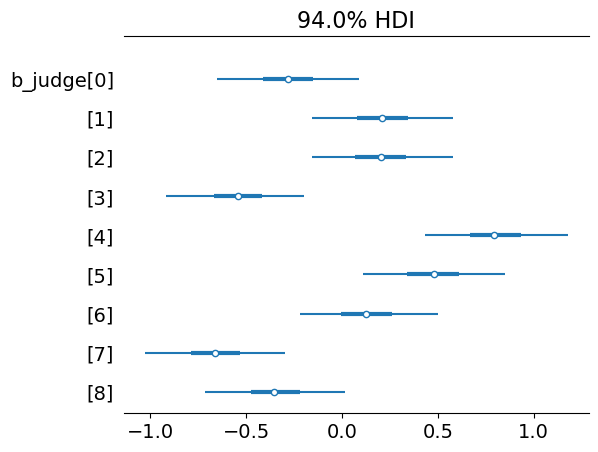

In [33]:
az.plot_forest(m_8h5_trace,combined=True, var_names='judge', filter_vars="like")

In [34]:
judges_results = pd.DataFrame(az.summary(m_8h5_trace, var_names='judge', filter_vars="like"))
judges_results['Name'] = judges.categories
judges_results['left'] = [i._3 if i._4 > i._3  else i._4  for i in judges_results.itertuples()]
judges_results['width'] = [(0 - i._3) + i._4 for i in judges_results.itertuples()]

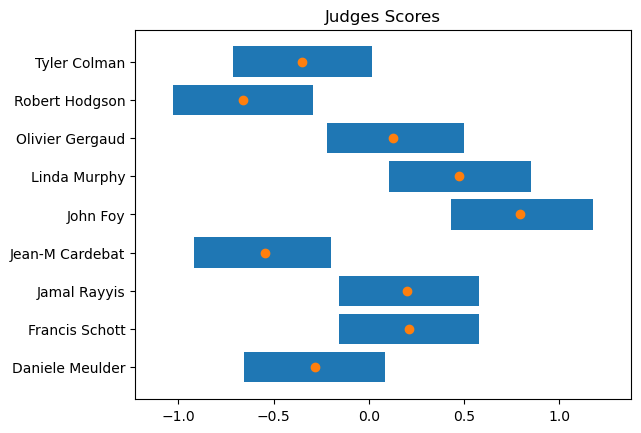

In [35]:
plt.barh(y=judges_results['Name'], width=judges_results['width'], left=judges_results['left'])
plt.scatter(y=judges_results['Name'], x =judges_results['mean'])
plt.xlim(judges_results['hdi_3%'].min() - 0.2, judges_results['hdi_97%'].max() + 0.2)
plt.title('Judges Scores')
plt.show()

It looks like some Judges consistently score higher or lower than others.  What's more interesting is that a lot of the bar widths are similar.  Does this mean the judges are consistent, even if their "mean" is different? 

In [38]:
wine_results = pd.DataFrame(az.summary(m_8h5_trace, var_names='wine', filter_vars="like"))
wine_results['Name'] = wines.categories
wine_results['left'] = [i._3 if i._4 > i._3  else i._4  for i in wine_results.itertuples()]
wine_results['width'] = [(0 - i._3) + i._4 for i in wine_results.itertuples()]

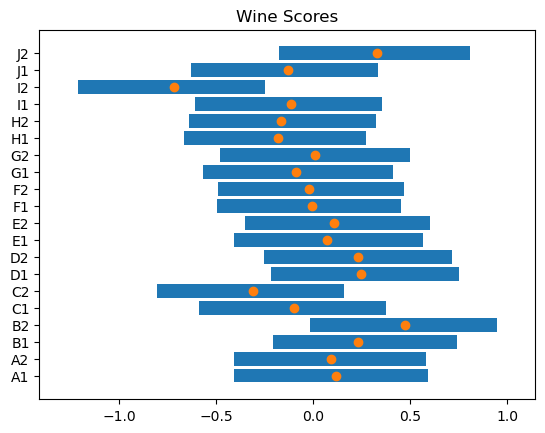

In [39]:
plt.barh(y=wine_results['Name'], width=wine_results['width'], left=wine_results['left'])
plt.scatter(y=wine_results['Name'], x =wine_results['mean'])
plt.xlim(wine_results['hdi_3%'].min() - 0.2, wine_results['hdi_97%'].max() + 0.2)
plt.title('Wine Scores')
plt.show()

As expected, some wines are rated better than others.  I2,C2,C1 and J2 really stands out

# 8H7 
Now consider three features of the wines and judges:
1. flight: Whether the wine is red or white.
2. wine.amer: Indicator variable for American wines.
3. judge.amer: Indicator variable for American judges.
Use indicator or index variables to model the influence of these features on the scores. Omit the
individual judge and wine index variables from Problem 1. Do not include interaction effects yet.
Again justify your priors. What do you conclude about the differences among the wines and judges?
Try to relate the results to the inferences in the previous problem.

In [41]:
flight = pd.Categorical(wines_data['flight'])
wine_amer = pd.Categorical(wines_data['wine.amer'])
judge_amer = pd.Categorical(wines_data['judge.amer'])

In [42]:
with pm.Model() as m_8h6:
    #a = pm.Normal("a", 1, 0.5)
    b_flight = pm.Normal("b_wine", 0, 0.5, shape = len(flight.categories))
    b_judge_a = pm.Normal("b_judge", 0, 0.5, shape = len(judge_amer.categories))
    b_wine_a = pm.Normal("b_wine_a", 0, 0.5, shape = len(wine_amer.categories))
    mu = b_flight[flight.codes] + b_judge_a[judge_amer.codes] + b_wine_a[wine_amer.codes]
    sigma = pm.Exponential("sigma", 1)
    score_std = pm.Normal("score_std", mu=mu, sigma=sigma, observed=wines_data["score_std"])
    m_8h6_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_wine, b_judge, b_wine_a, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [43]:
az.summary(m_8h6_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_wine[0],0.014,0.312,-0.615,0.541,0.008,0.006,1587.0,2143.0,1.0
b_wine[1],0.016,0.311,-0.580,0.580,0.008,0.006,1615.0,2039.0,1.0
b_judge[0],-0.135,0.303,-0.690,0.434,0.007,0.005,1815.0,2314.0,1.0
b_judge[1],0.110,0.304,-0.442,0.675,0.007,0.005,1796.0,2069.0,1.0
b_wine_a[0],0.094,0.300,-0.502,0.632,0.007,0.006,1611.0,1788.0,1.0
b_wine_a[1],-0.089,0.298,-0.620,0.491,0.007,0.005,1645.0,1922.0,1.0
sigma,1.003,0.055,0.902,1.112,0.001,0.001,2894.0,2265.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

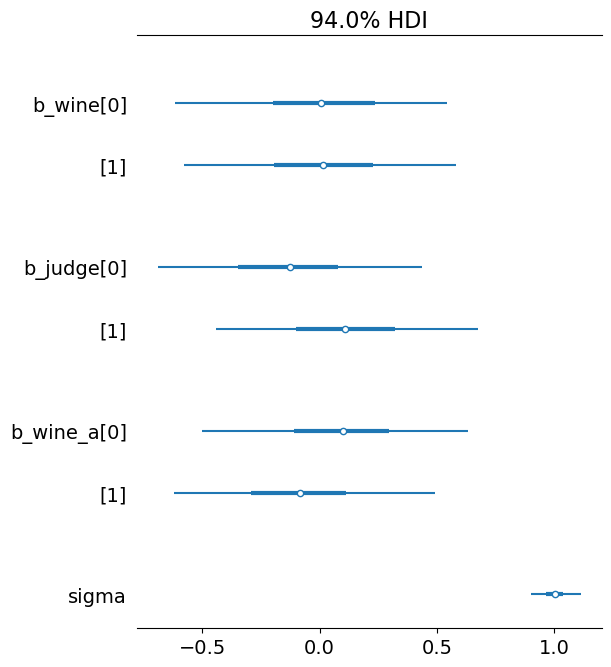

In [44]:
az.plot_forest(m_8h6_trace,combined=True)

The wine flight (white or red) is not influencing scores much.  One might assume that an american judge might be inclined to rate american wines higher, but that doesn't look like the case, becuase american judges seem to rate wines higher, but american wines score lower than other wines.

# 8H7. 
Now consider two-way interactions among the three features. You should end up with three
different interaction terms in your model. These will be easier to build, if you use indicator variables.
Again justify your priors. Explain what each interaction means. Be sure to interpret the model’s
predictions on the outcome scale (mu, the expected score), not on the scale of individual parameters.
You can use link to help with this, or just use your knowledge of the linear model instead. What do
you conclude about the features and the scores? Can you relate the results of your model(s) to the
individual judge and wine inferences from 8H5

In [46]:
flight = pd.Categorical(wines_data['flight'])
wine_amer = pd.Categorical(wines_data['wine.amer'])
judge_amer = pd.Categorical(wines_data['judge.amer'])

flight_wine_amer = flight.codes & wine_amer.codes #1 Means White Wine and American Wine
flight_judge_amer = flight.codes & judge_amer.codes #1 Means White Wine and American Judge
wine_judge_amer = wine_amer.codes & judge_amer.codes #1 Means American Wine and American Judge


In [47]:
with pm.Model() as m_8h7:
    b_flight = pm.Normal("b_flight", 0, 0.5, shape = len(flight.categories))
    b_judge_a = pm.Normal("b_judge_a", 0, 0.5, shape = len(judge_amer.categories))
    b_wine_a = pm.Normal("b_wine_a", 0, 0.5, shape = len(wine_amer.categories))
    b_fw_a = pm.Normal("b_fw_a", 0, 0.5, shape = 2)
    b_fj_a = pm.Normal("b_fj_a", 0, 0.5, shape = 2)
    b_wj_a = pm.Normal("b_wj_a", 0, 0.5, shape = 2)
    mu = (b_flight[flight.codes] + b_judge_a[judge_amer.codes] + b_wine_a[wine_amer.codes] 
          + b_fw_a[flight_wine_amer] + b_fj_a[flight_judge_amer] + b_wj_a[wine_judge_amer])
    sigma = pm.Exponential("sigma", 1)
    score_std = pm.Normal("score_std", mu=mu, sigma=sigma, observed=wines_data["score_std"])
    m_8h7_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_flight, b_judge_a, b_wine_a, b_fw_a, b_fj_a, b_wj_a, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


In [51]:
az.summary(m_8h7_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_flight[0],0.129,0.358,-0.479,0.851,0.006,0.005,3340.0,2748.0,1.0
b_flight[1],-0.111,0.351,-0.809,0.519,0.006,0.005,3384.0,2949.0,1.0
b_judge_a[0],-0.140,0.355,-0.833,0.508,0.006,0.005,3810.0,3115.0,1.0
b_judge_a[1],0.169,0.348,-0.500,0.801,0.006,0.005,3540.0,2799.0,1.0
b_wine_a[0],0.173,0.343,-0.470,0.834,0.006,0.005,3173.0,2691.0,1.0
b_wine_a[1],-0.169,0.339,-0.816,0.462,0.006,0.005,2791.0,2677.0,1.0
b_fw_a[0],-0.196,0.347,-0.824,0.475,0.006,0.005,3039.0,2600.0,1.0
b_fw_a[1],0.249,0.356,-0.407,0.942,0.006,0.005,3257.0,2500.0,1.0
b_fj_a[0],0.025,0.348,-0.619,0.689,0.007,0.006,2778.0,2620.0,1.0
b_fj_a[1],0.000,0.352,-0.674,0.662,0.007,0.005,2783.0,2507.0,1.0


Looking at this, the interaction of flight and judge, or american wine and american judge seems to have limited influence on the model.  Flight and American Judge does seem to have some effect, where white wines and american judges score higher than red wines.

In [52]:
flight_range = [0,1]
amer_wine_range = [0,1]
amer_judge_range = [0,1]

In [57]:
results_m_8h7 = pd.DataFrame()
for f in flight_range:
    for j in amer_judge_range:
        for w in amer_wine_range:
            posterior = m_8h7_trace.posterior
            # prediction = (posterior['b_flight'][:,:,f].mean().values + 
            #               posterior['b_judge_a'][:,:,j].mean().values  + 
            #               posterior['b_wine_a'][:,:,w].mean().values  + 
            #               posterior['b_fw_a'][:,:,f & w].mean().values + 
            #               posterior['b_fj_a'][:,:,f & j].mean().values +
            #               posterior['b_wj_a'][:,:,w & j].mean().values
            #)
            predictions = (posterior['b_flight'][:,:,f].values + 
                          posterior['b_judge_a'][:,:,j].values + 
                          posterior['b_wine_a'][:,:,w].values  + 
                          posterior['b_fw_a'][:,:,f & w].values + 
                          posterior['b_fj_a'][:,:,f & j].values +
                          posterior['b_wj_a'][:,:,w & j].values
            )
            #print (f'Flight: {f}, American Wine: {j}, American Judge: {w}, Prediction: {np.mean(predictions)}')
            hdi_values = az.hdi(np.mean(predictions, axis=0), hdi_prob=.97)
            judge_type = 'American Judge' if j == 1 else 'French Judge'
            wine_type = 'American Wine' if w == 1 else 'French Wine'
            id_string = f'{judge_type}, {wine_type}'
            flight_string = 'Red' if f == 0 else 'White'
            results_m_8h7 = results_m_8h7._append({'Color':flight_string,'American_Judge':j,'American_Wine':w, 'Id_String':id_string, 'Prediction': np.round(np.mean(predictions),2), 'hdi_low':np.round(hdi_values[0],2), 'hdi_high':np.round(hdi_values[1],2)}, ignore_index=True)

In [58]:
results_m_8h7['left'] = [i.hdi_low if i.hdi_high > i.hdi_low else i.hdi_high  for i in results_m_8h7.itertuples()]
results_m_8h7['width'] = [(0 - i.hdi_low) + i.hdi_high for i in results_m_8h7.itertuples()]

In [59]:
results_m_8h7

,Color,American_Judge,American_Wine,Id_String,Prediction,hdi_low,hdi_high,left,width
0,Red,0,0,"French Judge, French Wine",0.06,-0.19,0.25,-0.19,0.44
1,Red,0,1,"French Judge, American Wine",-0.28,-0.48,-0.08,-0.48,0.40
2,Red,1,0,"American Judge, French Wine",0.37,0.15,0.58,0.15,0.43
3,Red,1,1,"American Judge, American Wine",-0.08,-0.25,0.10,-0.25,0.35
4,White,0,0,"French Judge, French Wine",-0.18,-0.37,0.09,-0.37,0.46
5,White,0,1,"French Judge, American Wine",-0.08,-0.26,0.13,-0.26,0.39
6,White,1,0,"American Judge, French Wine",0.11,-0.11,0.32,-0.11,0.43
7,White,1,1,"American Judge, American Wine",0.10,-0.08,0.28,-0.08,0.36


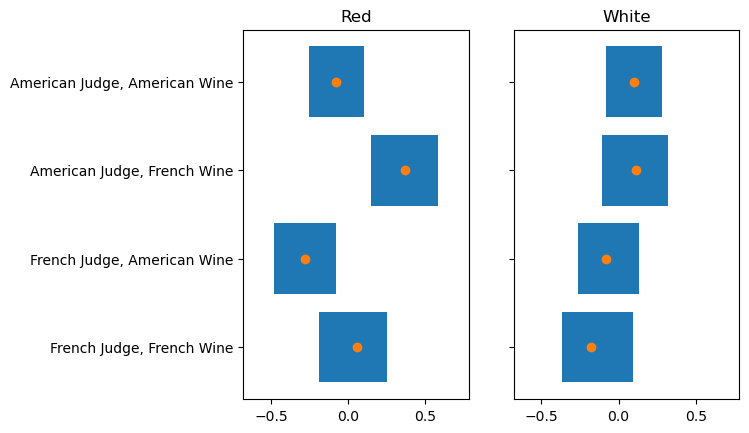

In [60]:
fig, ax = plt.subplots(ncols=2, sharey=True)
for i,value in enumerate(results_m_8h7['Color'].unique()):
    plot_data = results_m_8h7[results_m_8h7['Color'] == value]
    ax[i].barh(y=plot_data['Id_String'], width=plot_data['width'], left=plot_data['left'])
    ax[i].scatter(y=plot_data['Id_String'], x =plot_data['Prediction'])
    ax[i].set_xlim(results_m_8h7['hdi_low'].min() - 0.2, results_m_8h7['hdi_high'].max() + 0.2)
    ax[i].set_title(f'{value}')

In [61]:
flight_wine_judge = flight.codes & wine_amer.codes & judge_amer.codes #1 Means White Wine and American Wine

Just looking at the above chart based on the prediction intervals, American Judges prefer French Red Wines.  Maybe French judge don't like American Red Wine.  But it doesn't seem like this model is great, so it's probably not the best idea to read too much into these values

In [62]:
#Just for the sake of it, let's try a 3 way interaction
with pm.Model() as m_8h7_a:
    b_flight = pm.Normal("b_flight", 0, 0.5, shape = len(flight.categories))
    b_judge_a = pm.Normal("b_judge_a", 0, 0.5, shape = len(judge_amer.categories))
    b_wine_a = pm.Normal("b_wine_a", 0, 0.5, shape = len(wine_amer.categories))
    b_fw_a = pm.Normal("b_fw_a", 0, 0.5, shape = 2)
    b_fj_a = pm.Normal("b_fj_a", 0, 0.5, shape = 2)
    b_wj_a = pm.Normal("b_wj_a", 0, 0.5, shape = 2)
    b_fwj_a = pm.Normal("b_fwj_a", 0, 0.5, shape = 2)
    mu = (b_flight[flight.codes] + b_judge_a[judge_amer.codes] + b_wine_a[wine_amer.codes] 
          + b_fw_a[flight_wine_amer] + b_fj_a[flight_judge_amer] + b_wj_a[wine_judge_amer]
         + b_fwj_a[flight_wine_judge])
    sigma = pm.Exponential("sigma", 1)
    score_std = pm.Normal("score_std", mu=mu, sigma=sigma, observed=wines_data["score_std"])
    m_8h7_a_trace = pm.sample(idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_flight, b_judge_a, b_wine_a, b_fw_a, b_fj_a, b_wj_a, b_fwj_a, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


In [63]:
compare_data_8h7 = az.compare({'No Interactions':m_8h6_trace,
                               'Interactions':m_8h7_trace,
                              '3 Way Interactions':m_8h7_a_trace,},
           scale='deviance',
           ic='loo'
          )
compare_data_8h7

d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
d:\Python\venv\pymc_env\lib\site-packages\arviz\stats\stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'deviance' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
No Interactions,0,516.183200,4.660344,0.000000,0.587807,17.200029,0.000000,False,deviance
Interactions,1,516.631810,6.639017,0.448610,0.412193,17.172286,3.129872,False,deviance
3 Way Interactions,2,516.947173,7.352775,0.763973,0.000000,17.427171,3.148406,False,deviance


d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\backends\matplotlib\compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_loo (deviance)', ylabel='ranked models'>

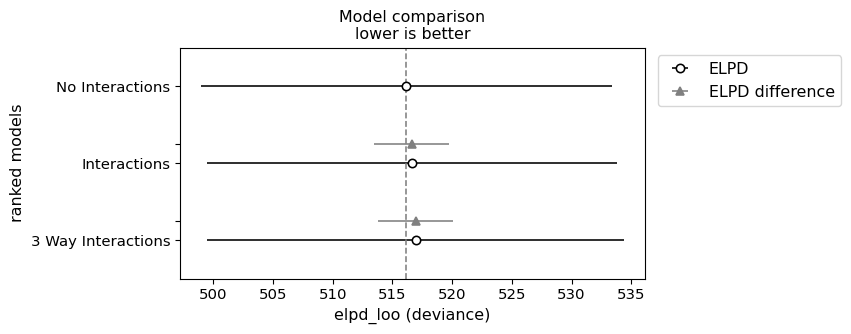

In [64]:
az.plot_compare(compare_data_8h7)

Note That the Interaction Seems to provide no real improvment to the model